*-------------------------------------------------------------------------------------------------*

**Hands-On Machine Learning with Scikit-Learn & TensorFlow**

**Chapter-06 - Decision Trees**

**Date : 07-April-2020**

*---------------------------------------------------------------------------------------------------*

**_Content :_**

* **Decision Tress
    * How to train, visualize and make predictions
    * CART training algortihms
    * How to regularize Trees

# Decision Tress

Decision Trees are verastile ML algorithms that can perform both Classification and Regression Tasks and even multioutput tasks.

*These involve stratifying or segmenting the predictor space into a number of simple regions. In order to make a prediction for a given observation, we typically use the mean or the mode of the training observations in the region to which it belongs. Since the set of splitting rules used to segment the predictor space can be summarized in a tree, these types of approaches are known as decision tree methods.*

Advantages:
* Are Intutive, easily interpretable because of its rule kind of structure and hence called white box model.
* Powerful aglorithm to fit complex datasets.
* Learns orthogonal boundries, which makes this senstive to training set rotation.
* Require very little data preparation, infact they dont require scaling and centering.
* Decision Trees make very less assumptions about the training data (like linear models that assumes data is linear).
* Estimates class probabilities ie at every node you can calculate using the proprtion of instances for that class.
* Fundamental Components of Random Forests.
* is called non-parametric models not because it doesnt have any parameters but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to data. *In contrast, linear models has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing risj of underfitting).

Disadvantages
* Trees are very non-robust. ie a small change in data can cause a large change in the final estimates.
* **overfitting**. High Variance, Low Bias: If left unconstrained the tree structure will adapt itself to the training data, fitting it very closely --indeed most likely **overfitting**.
* Greedy Approach to search hypothesis that best fits the data: It's ID3 or C4.5 algos, in search hypothesis space, do not perform back-track from the initial decision it took and hence can converge to local minima.


### The CART (classification and regression trees) training algorithm to create decision trees:

The alogrithm works by splitting the training set into two subsets using a single feature k and threshold tk for that feature eg. petal_length <= 2.5 cms.

**How does it choosed k and tk?**
It searches for the pair (k, tk) that produces the purest subsets (weighted by their size).

Cost function for CART algorithm:


Once the training set is splitted into two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches the maximum depth or if it cannot find a split that will reduce the impurity.

A few othe hyperparameters that control additional stopping criteria, regularization.
 * min_samples_split : 
 * min_samples_leaf
 * max_leaf_nodes
 * min_impurity_decrease
 * min_impurity_split
 
Othe alogrithms works by first training the tree without restrictions and then pruning (deleting) the unnecessary nodes. A node whose children are all leaf nodes are considered unnecessary if the purity improvements it provides is not statistical significant (chi-squared test)


**As you see the CART algorithm is a greedy algorithm, it greedly searches for the optimal split at every level. It does not check whether or not the split will lead to the lowest possible impurity at several levels down. A greedy algorithm often produces the solution that is reasonable good but not gauranteed to be optimal.**


Complexity : O(n * m log(m))  
n = number of instances
m = numner of features.

#### Gini Impurity or entropy

**The classification error rate**
We need a cost function which decision tree will try to minimize for an optimal soultion. A natural cost function for the classification is the Error rate. The classification error rate is simply the fraction of the training observations in that region that do not
belong to the most common class:

E = 1 − max (p̂ mk ).

Here p̂ mk represents the proportion of training observations in the mth region that are from the kth class. *However, it turns out that classification error is not sufficiently sensitive for tree-growing, and in practice two other measures are preferable.*

**Gini index**
The Gini index is defined by

a measure of total variance across the K classes. It is not hard to see that the Gini index takes on a small value if all of the p̂ mk’s are close to zero or one. For this reason the Gini index is referred to as a measure of
node purity—a small value indicates that a node contains predominantly observations from a single class.

**Cross-entropy**
An alternative to the Gini index is cross-entropy, given by


Like the Gini index, the cross-entropy will take on a small value if the mth node is pure. In fact, it turns out that the Gini index and the cross-entropy are quite similar numerically.


* Most of the time it does not make a difference they lead to similar trees.
* Gini impurity is slightly faster to compute, so it is a good default.
* When they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more banaced trees.



**Instability or Non-Robustness**


* Due to sensitive-ness variations in the training data

The main issue with the Decision Trees is that they are very sensitive to small variations in the training data.

Acrually, since the training alogrithm used by Scikit-learn is stochastic, you may get very different models even on the same training set (unless random_state is set)


* Due to Orientation of data

Decision Trees learns orthogonal boundries, which makes this senstive to training set rotation.
For an example, below is a simple linear separable data, on the left a decision tree can split it easily, while on right, after the data rotated 45 degree, the decision boundry looks unnecessarily convouted. 

Although both the below trees fit the training data perfectly, it is very likely that the model on the right will not generalize well. One way to resolve this is to use the Principal Components which often results in better orientation of data.


In [45]:

from sklearn.tree  import DecisionTreeClassifier, export_graphviz
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

# Function to plot decision boundry, restricted to 2-d plots ie 2 features
def plot_decision_boundry(model,X):
    x1, x2 = np.meshgrid(np.arange(X[:,0].min() -.5, X[:,0].max() +.5 , 0.05),
                         np.arange(X[:,1].min() -.5, X[:,1].max() +.5,  0.05))
    y_plot_pred_probs = model.predict_proba(np.c_[x1.ravel(), x2.ravel()])[:,1]

    plt.contourf(x1,
                 x2,
                 y_plot_pred_probs.reshape(x1.shape), cmap=cm, alpha=.7)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    

# SVM vs Logistic Regression

In [3]:
# Lets create a manual dataset
np.random.seed(10)
n = 10
X = np.concatenate((2*np.random.rand(n,2)+1,3*np.random.rand(n,2)+5))
y = np.concatenate((np.repeat(0,n),np.repeat(1,n)))


## Logistic Regression vs linear SVM
(Without Regualrization)

As you can see when both of the classification models (Logistic and SVM) has no regularization 
* The max margin better decision boundry is learned by SVM and not Logistic 
* Weights are more for logistic regression for similar parameters

Because the formulation of SVM is based on maximizing the geometrical margin of the decision boundry while in case of logistic it is maximizing the likelihood, which tries to overfit.

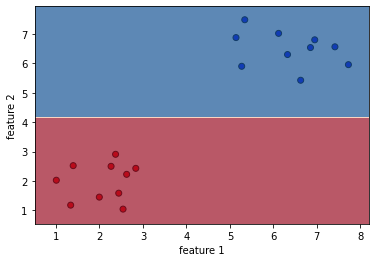

In [16]:
# Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=2) 
tree_clf.fit(X,y)

#y_train_proba = log_reg.predict_proba(X)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_bright, edgecolor='k')

plot_decision_boundry(tree_clf,X)
plt.show()
#export_graphviz(tree_clf, out_file = "tree.out")

## How outlier affects the SVM decision boundry

As you see, decision boundry has been compromised a lot to classify the outlier.

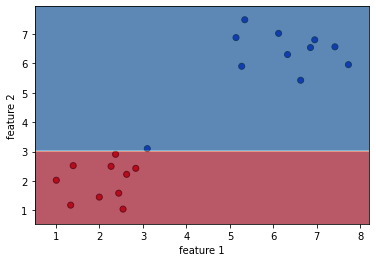

In [19]:
from sklearn.svm import SVC
# Now add an outlier to the above data, class 1 instance very near to class 0.
X2 = np.concatenate((X, np.array([[3.1,3.1]])))
y2 = np.concatenate((y,[1]))

tree_clf = DecisionTreeClassifier(max_depth=2) 
tree_clf.fit(X2,y2)

plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=cm_bright, edgecolor='k')
plot_decision_boundry(tree_clf,X2)


# Non-Linear classification problem

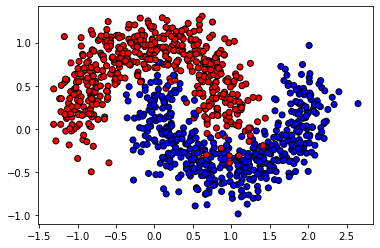

In [71]:
# Lets make a polynomial classifier for non-linear classification problem

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score

# Generating the data
# Training Set
X,y = make_moons(n_samples = 1000, noise =0.2)
# Test Set
X_test,y_test = make_moons(n_samples = 1000, noise =.2)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_bright,
            edgecolor='k')
plt.show()

**Decision Tree can easily classify complex polynomial data without generating polynomial features**

--> Accuracy of the model on Trainset:  0.979
--> Accuracy of the model on Testset:  0.96


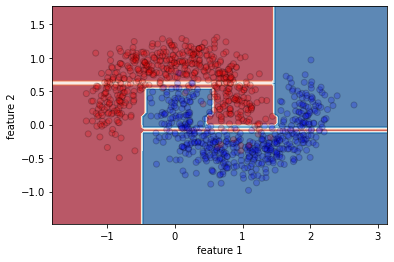

In [76]:
# Training the model
tree_clf = DecisionTreeClassifier(criterion = 'gini',max_depth=5 , min_samples_split=3)  
    # Hyperparameters : 
     ## criterion : to calculate impurity at each node split, 'gini':default or 'entropy'
    # Below are the parameters to regualrize, limits the tree to grow full until training data is fully classified correctly.
     ## max_depth : puts an upper limit on tree depth, default none means the tree will expand until all leaves are pure
     ## min_samples_split : 
     ## min_samples_leaf
     ## max_leaf_nodes
     ## min_impurity_decrease
     ## min_impurity_split : analogous to tolerance
                                               
tree_clf.fit(X,y)

y_pred = tree_clf.predict(X)            # Train data
y_test_pred = tree_clf.predict(X_test)  # Test data

print('--> Accuracy of the model on Trainset: ',accuracy_score(y,y_pred))
print('--> Accuracy of the model on Testset: ',accuracy_score(y_test,y_test_pred))

plot_decision_boundry(tree_clf,X)

# Plotting the training data
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_bright,
            edgecolor='k',alpha=.2)


## Decision Tree for Regression



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_quadratic_data(number_of_instances):
    X = 8* np.random.rand(number_of_instances,1) - 5
    y = 0.5 * X**2  + X + 1 +  np.random.randn(number_of_instances,1) #np.random.uniform(low = -1, high = 1,size = (m,1))
    return(X,y)

X,y = generate_quadratic_data(500)
X_test,y_test = generate_quadratic_data(500)

X_plot = np.linspace(X[:,0].min()-.05,X[:,0].max()+.05,100).reshape(-1,1)

plt.plot(X_test,y_test, 'b.')
plt.show()

<Figure size 640x480 with 1 Axes>

--> Accuracy of the model on Trainset:  0.9049253491377256
--> Accuracy of the model on Testset:  1.1915860919898038


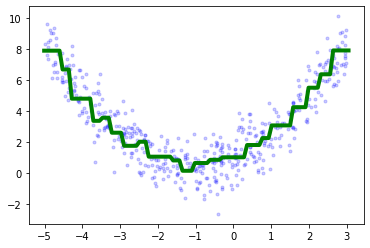

In [3]:
# Training the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(criterion = 'mse', min_samples_leaf=19)#max_depth=5, min_samples_split=40 ) 

tree_reg.fit(X,y)

y_pred = tree_reg.predict(X)            # Train data
y_test_pred = tree_reg.predict(X_test)  # Test data
y_plot_pred= tree_reg.predict(X_plot)  # Plotting graph data

print('--> Accuracy of the model on Trainset: ',mean_squared_error(y,y_pred))
print('--> Accuracy of the model on Testset: ',mean_squared_error(y_test,y_test_pred))

# Plotting the data
plt.plot(X_test,y_test, 'b.',alpha=.2)
plt.plot(X_plot,y_plot_pred, 'g-', linewidth=4)
plt.show()

In [ ]:
# Training the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(criterion = 'mse', max_depth=5)#, min_samples_split=40 ) 
tree_reg.fit(X,y)

y_pred = tree_reg.predict(X)            # Train data
y_test_pred= tree_reg.predict(X_test)  # Test data
y_plot_pred= tree_reg.predict(X_plot)  # Plotting graph data

print('--> Accuracy of the model on Trainset: ',mean_squared_error(y,y_pred))
print('--> Accuracy of the model on Testset: ',mean_squared_error(y_test,y_test_pred))

# Plotting the training data
plt.plot(X_test,y_test, 'b.',alpha=.2)
plt.plot(X_plot,y_plot_pred, 'g-', linewidth=4)
plt.show() U